# Letter to the editor: a note on “A New Extended Rayleigh Distribution”

authors: Luiz R. Nakamura, Thiago G. Ramires and Ana J. Righetto

Here we present some results using well-known probabilistic models to compare with those presented in:
 A. A. Al-Babtain, A new extended Rayleigh distribution, Journal of King Saud University – Science, https://doi.org/10.1016/j.jksus.2020.04.015


The R codes are shown below. First, we load the data (gauge lengths of 10 mm) obtained from D. Kundu and MZ Raqab (2009)

In [4]:
x <- c(1.901, 2.132, 2.203, 2.228, 2.257, 2.350, 2.361, 2.396, 2.397, 2.445, 2.454, 2.474, 2.518, 2.522, 
       2.525, 2.532, 2.575, 2.614, 2.616, 2.618, 2.624, 2.659, 2.675, 2.738, 2.740, 2.856, 2.917, 2.928, 
       2.937, 2.937, 2.977, 2.996, 3.030, 3.125, 3.139, 3.145, 3.220, 3.223, 3.235, 3.243, 3.264, 3.272, 
       3.294, 3.332, 3.346, 3.377, 3.408, 3.435, 3.493, 3.501, 3.537, 3.554, 3.562, 3.628, 3.852, 3.871, 
       3.886, 3.971, 4.024, 4.027, 4.225, 4.395, 5.020)


Now, we fit three well-know models, Log-normal, inverse Gausian and gamma. 

In [7]:
library(gamlss)
mGA <- gamlssML(x, family=GA)
mLNO <- gamlssML(x, family=LOGNO)
mIG <- gamlssML(x, family=IG)


We can check now the lowest value of AIC and BIC criteria. We will be confronted with the results presented in the paper.

In [12]:
results=cbind(AIC=c(mIG$aic,mLNO$aic,mGA$aic,173.47,189.05),BIC=c(mIG$sbc,mLNO$sbc,mGA$sbc,173.07, 188.85))
row.names(results)=c('inverse Gausian','log-normal','gamma','TIHLR','Rayleigh')
results


,AIC,BIC
inverse Gausian,116.7543,121.0405
log-normal,116.8454,121.1317
gamma,117.7575,122.0438
TIHLR,173.4700,173.0700
Rayleigh,189.0500,188.8500


We can also check the results using the fitted pdf and cdf

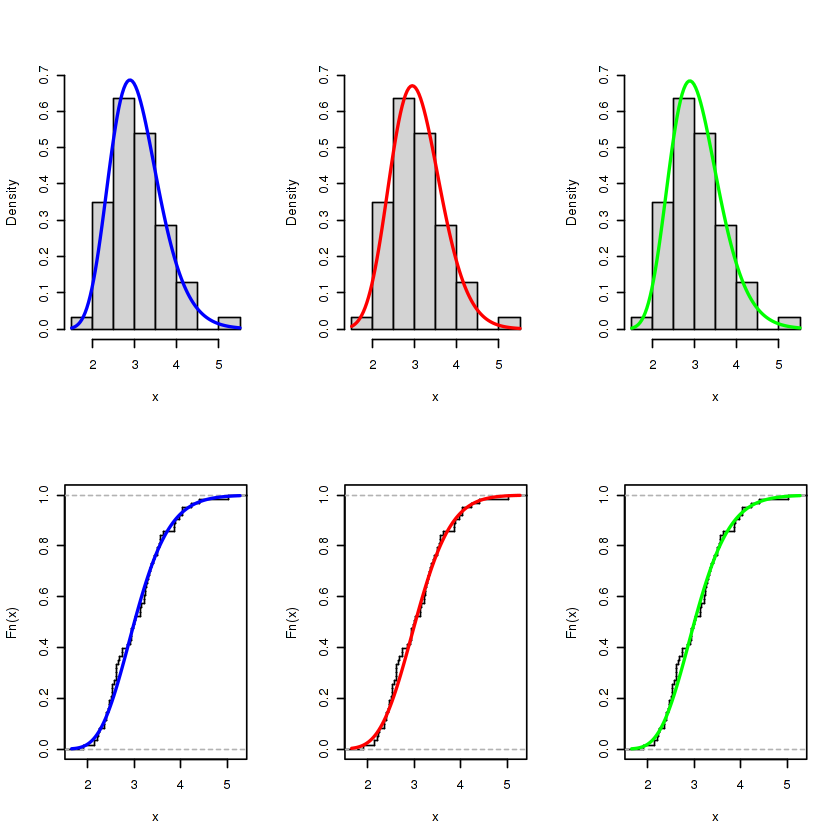

In [14]:
par(mfrow=c(2,3))
hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dLNO(x,mLNO$mu.coefficients,exp(mLNO$sigma.coefficients)), add=T, lwd=2, col='blue')
hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dGA(x,exp(mGA$mu.coefficients),exp(mGA$sigma.coefficients)), add=T, lwd=2, col='red')
hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dIG(x,exp(mIG$mu.coefficients),exp(mIG$sigma.coefficients)), add=T, lwd=2, col='green')

plot(ecdf(x),verticals = TRUE,do.points = FALSE, main='')
curve(pLNO(x,mLNO$mu.coefficients,exp(mLNO$sigma.coefficients)), add=T, lwd=2, col='blue')
plot(ecdf(x),verticals = TRUE,do.points = FALSE, main='')
curve(pGA(x,exp(mGA$mu.coefficients),exp(mGA$sigma.coefficients)), add=T, lwd=2, col='red')
plot(ecdf(x),verticals = TRUE,do.points = FALSE, main='')
curve(pIG(x,exp(mIG$mu.coefficients),exp(mIG$sigma.coefficients)), add=T, lwd=2, col='green')

